In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tcc_ceds_music.csv")
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [4]:
len(['artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len'])

6

In [5]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [6]:
len(['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'])

24

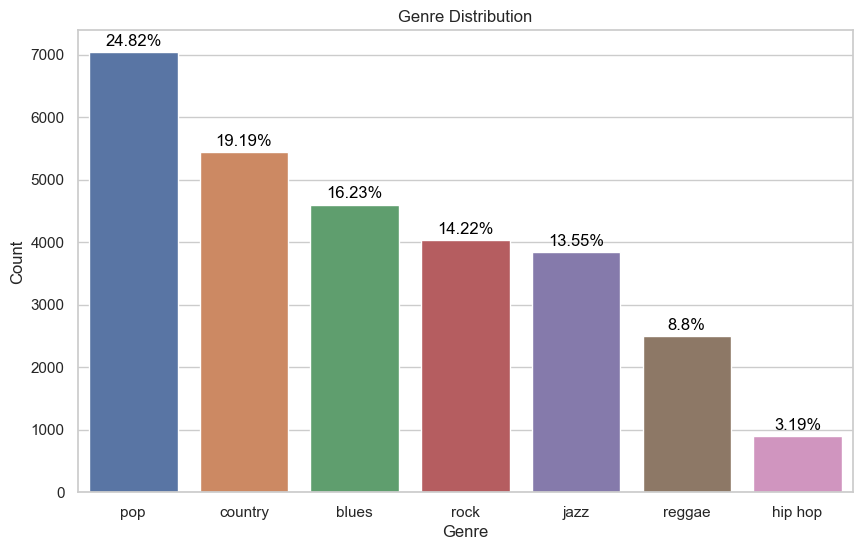

In [7]:
values = dict(df["genre"].value_counts())
total = sum(values.values())
percentages = {genre: count / total * 100 for genre, count in values.items()}

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=list(values.keys()), y=list(values.values()))
for i, count in enumerate(values.values()):
    percentage = round(percentages[list(values.keys())[i]], 2)
    ax.text(i,count+100, f"{percentage}%", ha='center', color="black")
    
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig("genre_distribution.png")

### Explore PCA and clustering based on features

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [9]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']

In [10]:
dfs = StandardScaler().fit_transform(df[features])

In [13]:
from umap import UMAP

umap = UMAP(n_components=2, init="random", random_state=0)
umap_data = umap.fit_transform(dfs)

c:\Users\anzek\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\anzek\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\anzek\AppData\Local\Programs\Python\Python3

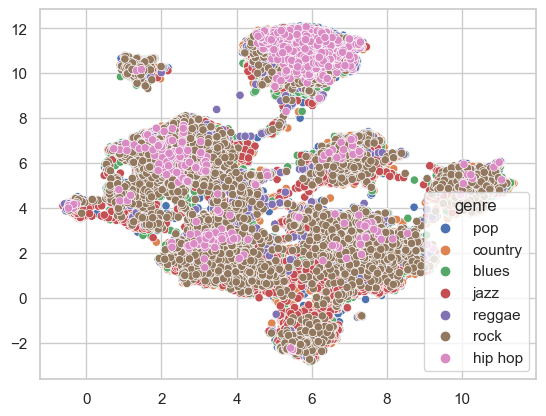

In [14]:
plt.figure()
df3 =df.copy()
df3["x"] = umap_data[:,0]
df3["y"] = umap_data[:,1]
sns.scatterplot(data=df3, x="x", y="y", hue="genre")
plt.xlabel("")
plt.ylabel("")
plt.savefig("umap-genres.png")

In [23]:
df_cluster = df3[["x", "y"]]

from sklearn.cluster import OPTICS, KMeans, AgglomerativeClustering, ward_tree, Birch, spectral_clustering

dbs = KMeans(n_clusters=9, n_init="auto")
dbs_data = dbs.fit_predict(dfs)
df3["cluster"] = dbs_data

Text(0, 0.5, '')

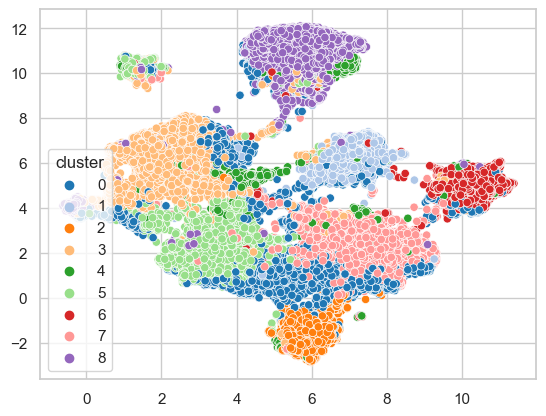

In [26]:
n_clusters = len(np.unique(dbs_data))

plt.figure()
plt.set_cmap("tab20")
sns.scatterplot(data=df3, x="x", y="y", hue="cluster", palette="tab20")
plt.xlabel("")
plt.ylabel("")
# plt.legend([],[], frameon=False)
#plt.savefig(f"umap-kmeans-{n_clusters}-genres.png")

In [25]:
df[df3["cluster"] == 1]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
16,40,les paul,blue skies,1951,pop,blue sky smile blue sky bluebirds sing song bl...,43,0.001385,0.001385,0.001385,...,0.001385,0.063931,0.635005,0.604877,0.991968,0.847166,0.462077,0.284262,music,0.985714
23,62,les paul,smoke rings,1952,pop,tell smoke ring blow night circle blue white p...,35,0.001645,0.001645,0.001645,...,0.071715,0.001645,0.432470,0.665308,0.887550,0.000155,0.242580,0.376357,music,0.971429
24,64,mukesh,hum tujhse mohabbat kar ke,1952,pop,fly high sing good bring sing like brother tel...,73,0.000810,0.000810,0.000810,...,0.000810,0.083152,0.701072,0.707074,0.861446,0.004838,0.600165,0.199174,music,0.971429
26,66,lata mangeshkar,main na janoon,1952,pop,watch sunrise tropic isle pyramid nile remembe...,38,0.045052,0.002105,0.002105,...,0.002105,0.002105,0.610094,0.614030,0.952811,0.923077,0.914468,0.335315,music,0.971429
35,86,les paul,i'm sitting on top of the world,1953,pop,sit world roll roll quit blue world sing song ...,31,0.001880,0.001880,0.148561,...,0.040906,0.001880,0.740063,0.638489,0.567269,0.037146,0.760923,0.550537,music,0.957143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27988,81864,fumez the engineer,pull up hop out bang,2016,hip hop,ring bell time mean hatred fare thee piece cou...,118,0.000684,0.262988,0.000684,...,0.085033,0.000684,0.761724,0.771146,0.554216,0.000000,0.812448,0.824819,music,0.057143
28051,81971,audio two,make it funky,2017,hip hop,sameoldshawn kind music listen time start rap ...,82,0.001253,0.001253,0.001253,...,0.001253,0.001253,0.935016,0.487373,0.018473,0.000003,0.753710,0.430413,music,0.042857
28114,82070,shonlock,boggie bounce,2017,hip hop,moments know cause step tallest sail leave wav...,98,0.000731,0.089705,0.000731,...,0.000731,0.000731,0.865699,0.770556,0.127509,0.000000,0.378607,0.592580,music,0.042857
28290,82345,gang starr,jazz thing,2019,hip hop,feat branford marsalis instrumentally like pla...,80,0.001224,0.207224,0.001224,...,0.001224,0.001224,0.720568,0.556393,0.180722,0.000019,0.622836,0.590578,music,0.014286
